**Использованные метрики**

В контексте процесса решения задач детей можно оценивать по двум характеристикам — старательность и талант. Встал вопрос о создании метрик для оценки этих характеристик исключительно на основе данных о сданных задачах. В основе идей для метрик лежит мысль: талантливый, но не старательный ребёнок из-за личных предпочтений может не захотеть решать задачи определённой темы, но при этом способен решить очень сложные, практически невыполнимые для большинства задачи из другой, более интересной ему области. Старательный, но менее талантливый ребёнок, напротив, наверняка справится с задачей, которую решили многие, но столкнётся с трудностями там, где требуется особая смекалка. Таким образом, чтобы при оценке ребенка обращать большее внимание на его старательность, больший вес следует придавать задачам, которые решило много учеников, а если хочется оценить талант — наоборот, больший вес нужно отдавать задачам с малым количеством сдач.

Приведём формулу вычисления весов задач для метрики, которая больше ценит талант ученика, чем его старательность (очки за задачи по этой метрике будем называть *соревновательными*). Хочется, чтобы формула давала большие веса задачам, которые решили лишь 2–3 человека (при размере группы в 12 человек), и занижала веса задач, которые решили почти все. Для таких целей была выбрана сигмоида.

*w* - вес задачи, *n* - количество учеников в группе, *m* - количество сдавших задачу учеников, *w<sub>min</sub>* - минимальный возможный вес за задачу, *w<sub>max</sub>* - максимальный возможный вес за задачу

Пусть
$$
b = -\ln\left(\frac{1}{w_{\max}} - 1\right),
\quad
k = \frac{\ln\left(\tfrac{1}{w_{\min}} - 1\right) - \ln\left(\tfrac{1}{w_{\max}} - 1\right)}{n}
$$

Тогда:
$$w =\frac{1}{1 + e^{\;\;k \cdot m - b}}$$

График веса задачи в зависимости от числа сдавших её учеников (при размере группы 12, минимальном и максимальном весом за задачу 0.01 и 0.99 соответственно):

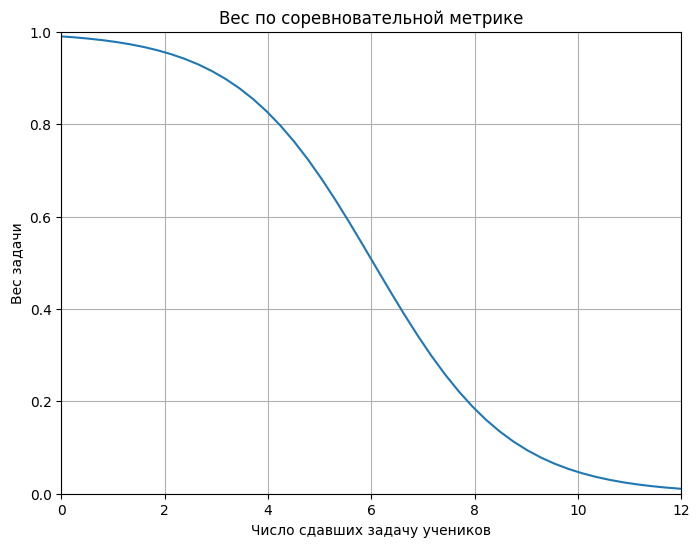

In [20]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(0, 13)
plt.figure(figsize=(8, 6))
plt.plot(x, 1 / (1 + np.exp(0.76 * x - 4.59)))
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.xlabel("Число сдавших задачу учеников")
plt.ylabel("Вес задачи")
plt.title("Вес по соревновательной метрике")
plt.grid(True)
plt.show()

Метрика, ориентированная на старательность (очки по ней будем называть *рабочими*), использовалась для выставления оценок по занятиям, поэтому формула должна быть максимально простой и понятной для детей. Была выбрана следующая формула:
$$w = m$$

Для оценки качества этих метрик воспользуемся данными учителя группы «Лютики», который ведёт у них уроки уже третий год и хорошо знает каждого ребёнка. Он поставил каждому ученику группы оценку за старательность и талант по 10-балльной шкале.

| Имя           | Старательность | Талант |
|---------------|----------------|--------|
| Полина А.     | 7              | 9      |
| Андрей Б.     | 7              | 7      |
| Дмитрий Б.    | 10             | 8      |
| **Максим Д.**     | 5              | 10      |
| Марк З.       | 3              | 6      |
| Ульяна И.     | 5              | 6      |
| Мариам М.     | 6              | 7      |
| **Дэвид О.**      | 10             | 5      |
| Иван П.       | 7              | 7      |
| Екатерина П.  | 8              | 8      |
| Валерия С.    | 6              | 6      |
| Ксения Х.     | 10             | 10     |

Что можно заметить:

1) Дэвид является одним из самых старательных учеников в группе, при этом, по мнению учителя, его талант средний.
2) Максим же, наоборот, довольно талантлив, но не отличается трудолюбием.

Сначала выведем общее количество сданных задач каждым учеником

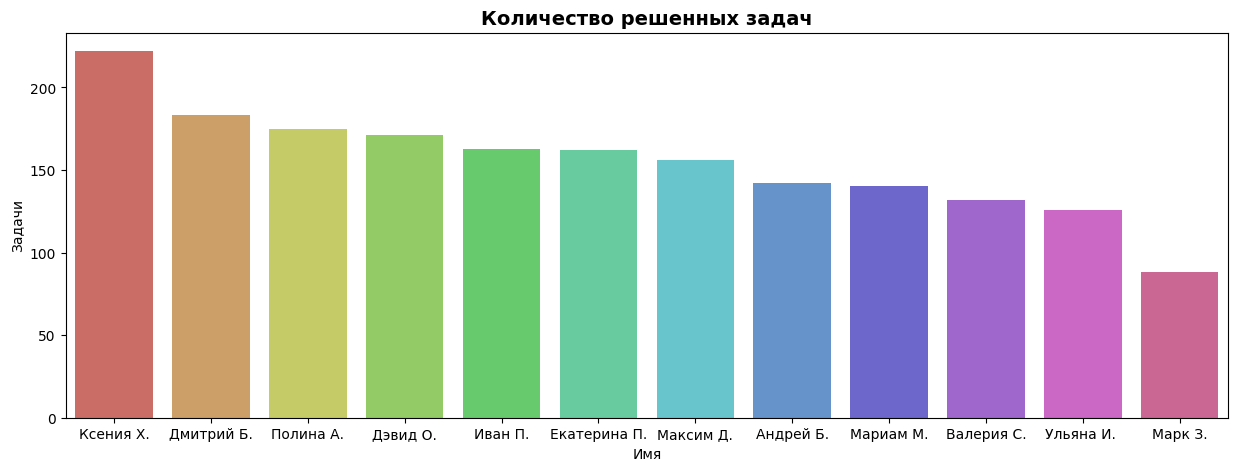

In [21]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("buttercups_2024-2025\problems_buttercups.csv", delimiter=";")

total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Задачи").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=14)
sns.barplot(total_problems, x="Имя", y="Задачи", palette="hls", hue="Имя")
plt.show()

Видна заметная разница, между Дэвидом и Максимом. Теперь поробуем сравнить их с учётом веса за задачи по метрике таланта

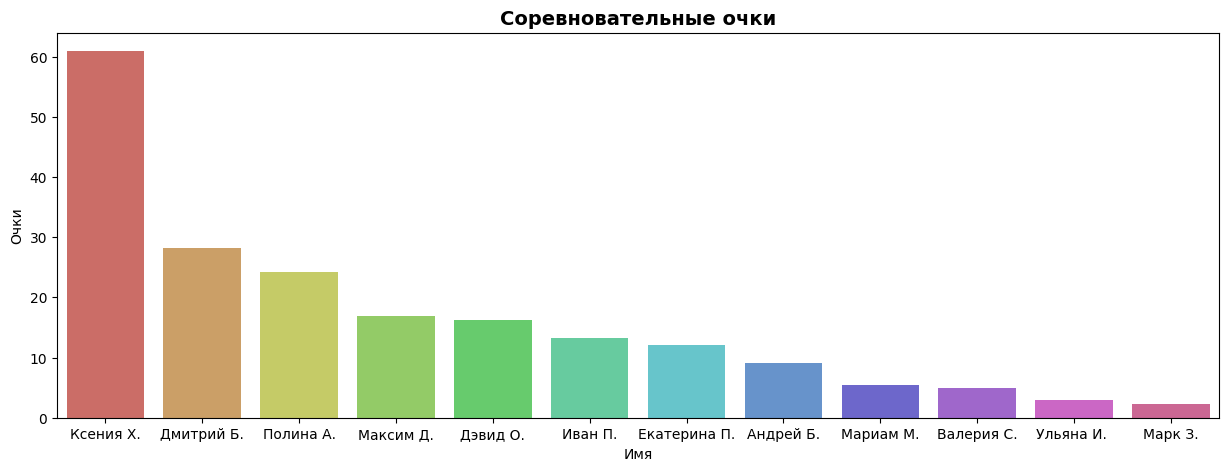

In [22]:
comp_points = an.competative_points(df, weight_func = "sigm").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.show()

Максим, имея значительно меньше сданных задач, сумел обогнать Дэвида и всех учеников, которых учитель оценил как менее талантливых.

Стоит отметить, что метрика не позволяет полностью отделить талант от старательности: так, Дмитрий и Полина, которых учитель считает менее талантливыми, чем Максим, имеют существенно больше соревновательных очков.

Теперь проверим метрику рабочих очков.

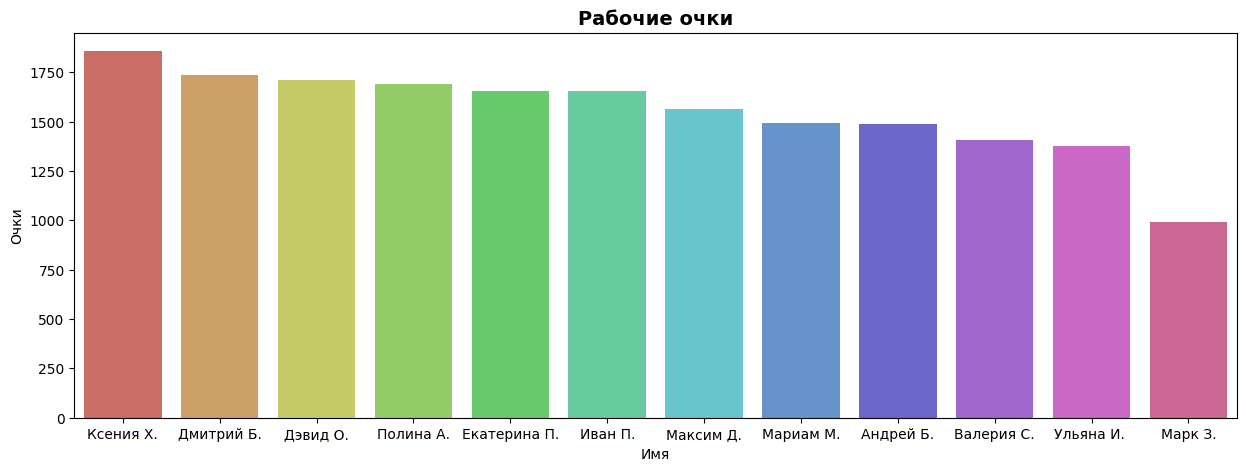

In [23]:
work_points = an.work_points(df, weight_func = "linear").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Рабочие очки", weight="heavy", size=14)
sns.barplot(work_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.show()

Метрика верно выделила трёх самых старательных учеников (согласно оценке учителя), а также поставила Дэвида выше всех менее старательных, но более талантливых учеников.

Однако, как и в случае с метрикой таланта, результат не идеален: Максим, являясь одним из наименее старательных учеников, оказался не в самом конце списка.